# Manifold GMM

There are two trials to implement Manifold GMM in this package:

./ManifoldGMM.py

./clustering/ManifoldGMM.py

First one has a problem of converting from numpy to torch tensor.

The latter is based on geoopt but it converges to the same center.


### First One

In [1]:
from ManifoldGMM import ManifoldGMM
from hype.util.reconstruct import HypType, Reconstruct
import numpy as np
import pandas



In [2]:
emb_filename = './data/olp_goals_connected_lorentz2D_emb.csv'
graph_filename = './data/olp_goals_connected.csv'
recon = Reconstruct.fromFiles(emb_filename, graph_filename)


In [3]:
recon.convert_manifold(HypType.Poincare)
data = np.array(list(recon.embedding_dict.values()))
manifold_dim = data.shape[1]
display(recon.embedding_dict)

(275, 3)


{'SO0196': array([0.01544822, 0.99986877]),
 'tool11.R0.station_203r': array([-0.0154668 ,  0.99568394]),
 'R0.station_203r': array([0.08588076, 0.96041565]),
 'station_203r': array([ 0.32952257, -0.53270626]),
 'factory': array([ 0.0702773 , -0.01491237]),
 'tool12.R0.station_203r': array([-0.04724837,  0.99753149]),
 'tool13.R0.station_203r': array([0.11544829, 0.989381  ]),
 'tool14.R0.station_203r': array([0.06217347, 0.98857634]),
 'tool15.R0.station_203r': array([0.32097108, 0.93946896]),
 'tool16.R0.station_203r': array([-0.13385851,  0.98100058]),
 'tool18.R0.station_203r': array([0.43551674, 0.88469444]),
 'tool21.R1.station_203r': array([ 0.73628676, -0.55422145]),
 'R1.station_203r': array([ 0.30381804, -0.68283754]),
 'tool22.R1.station_203r': array([-0.16475696, -0.96366863]),
 'tool23.R1.station_203r': array([-0.40007169, -0.90926479]),
 'SO0197': array([-0.51441347,  0.85753285]),
 'SO0198': array([-0.56182841,  0.82723776]),
 'SO0199': array([-0.62763941,  0.77849748]),

In [4]:
# GMM on the Poincare ball
# Initialize the GMM parameters
nb_clusters = 2
initial_means = np.vstack((data[3], data[150]))
initial_covariances = np.concatenate(nb_clusters * [1*np.eye(manifold_dim)[None]], 0)
initial_priors = np.ones(nb_clusters)/nb_clusters

# EM algorithm
gmm_means, gmm_covariances, gmm_priors, gmm_assignments = ManifoldGMM.manifold_gmm_em(recon.manifold, data, nb_clusters,
                                                                          initial_means=initial_means,
                                                                          initial_covariances=initial_covariances,
                                                                          initial_priors=initial_priors)

TypeError: can't assign a numpy.ndarray to a torch.DoubleTensor

In [ ]:
L_log = np.array([[-1.8783e+01, -2.8585e+10],
        [-1.3039e+01, -1.6124e+10],
        [-1.1703e+01, -1.2532e+10]])

L_log = np.array([[-5.6653, -4.8336],
        [-5.0978, -4.8336],
        [-4.9671, -4.8336]])

from scipy.special import logsumexp

rr = np.max(L_log, axis=1) + logsumexp(L_log, axis=1)[:, None]
print(rr)

# L = np.exp(L_log - rr)
# print(L)
print(np.exp(logsumexp(L_log[0,:])))



[[-9.3058201  -9.3058201  -9.3058201 ]
 [-9.09745287 -9.09745287 -9.09745287]
 [-9.03857669 -9.03857669 -9.03857669]]
0.011421929864312773


In [ ]:
c = np.max(L_log[0, :])
print(L_log[0, :])
print(c)
lse = c + np.log(np.sum(np.exp(L_log[0, :] - c)))
print(lse)
p = np.exp(L_log[0, :] - lse)
print(p)
print(np.exp(L_log[0, 1] - lse))

[-5.6653 -4.8336]
-4.8336
-4.4722200991616825
[0.30328573 0.69671427]
0.6967142658503211


In [ ]:
L = np.exp(L_log)
print(L)
r = L / (np.sum(L, axis=1)[:, None] + 1e-10)
print(r)

[[6.96060111e-09 0.00000000e+00]
 [2.17387341e-06 0.00000000e+00]
 [8.26897499e-06 0.00000000e+00]]
[[0.9858369  0.        ]
 [0.999954   0.        ]
 [0.99998791 0.        ]]


In [ ]:
initial_covariances

array([[[100.,   0.,   0.],
        [  0., 100.,   0.],
        [  0.,   0., 100.]],

       [[100.,   0.,   0.],
        [  0., 100.,   0.],
        [  0.,   0., 100.]]])

In [ ]:
# cluster = np.zeros_like(gmm_assignments)
# cluster_ind = np.argmax(gmm_assignments, axis=1)
# cluster[np.arange(cluster_ind.size), cluster_ind] = 1

cluster = np.argmax(gmm_assignments, axis=1)
print(cluster)
print(gmm_means)
print(initial_means)
print(initial_priors)
print(gmm_priors)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[-0.04695999  2.05167389]
 [-0.0294835   2.05133772]]
[[ 0.32952257 -0.53270626]
 [-0.85177868 -0.52387509]]
[0.5 0.5]
[0.57785151 0.42214849]


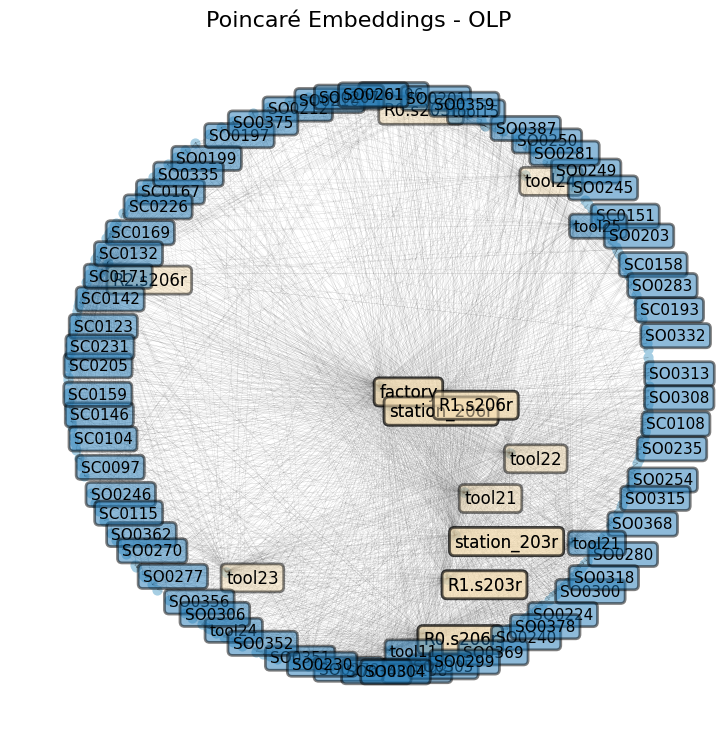

In [ ]:
from hype.util.visualize import *

embedding_dict = recon.embedding_dict

node_names = list(embedding_dict.keys())
label_dict = {}
for i in range(len(embedding_dict)):
    label_dict[node_names[i]] = cluster[i]

my_graph = pandas.read_table(graph_filename, delimiter=',')

ig_filename = './data/olp_goals_ig.csv'
ig = pandas.read_csv(ig_filename)
plot_embedding2D(embedding_dict, label_dict, my_graph, 0.001, 1, 'Poincaré Embeddings - OLP', save_fig=True, 
                 save_filename='./images/olp2D_clustering.png', plot_edge=True, groups=list(ig['id']))


### Second One

In [5]:
%load_ext autoreload
%autoreload 2

import clustering.ManifoldGMM as geoGMM
import geoopt
import torch

ball = geoopt.PoincareBall()
lorentz = geoopt.Lorentz()


In [8]:
recon.convert_manifold(HypType.Poincare)
data = np.array(list(recon.embedding_dict.values()))
manifold_dim = data.shape[1]


nb_clusters = 2
idx = [3, 150]
# idx = np.random.randint(data.shape[0], size=nb_clusters)
initial_means = np.vstack(data[idx])
print(idx)
initial_covariances = np.concatenate(nb_clusters * [10*np.eye(manifold_dim)[None]], 0)
initial_priors = np.ones(nb_clusters)/nb_clusters

my_man = geoopt.Lorentz()

lorentzGMM = geoGMM.ManifoldGMM(lorentz)
ballGMM = geoGMM.ManifoldGMM(ball)
my_man = lorentz
# means, covariances, priors, responsibilities = lorentzGMM.manifold_gmm_em(data, nb_clusters, initial_means=initial_means, initial_covariance=initial_covariances, initial_priors=initial_priors)
means, covariances, priors, responsibilities = ballGMM.manifold_gmm_em(data, nb_clusters, initial_means=initial_means, initial_covariances=initial_covariances, initial_priors=initial_priors)
print(means)

[3, 150]
The EM algorithm converged after {8} iterations.
tensor([[ 0.0015, -0.0051],
        [ 0.0015, -0.0051]])


/home/byungchul/.pyenv/versions/3.8.5/envs/poincare_embedding_torch2/lib/python3.8/site-packages/geoopt/manifolds/stereographic/math.py:1943: UserWarning: operator() profile_node %117 : int = prim::profile_ivalue(%115)
 does not have profile information (Triggered internally at ../third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return _weighted_midpoint(


In [10]:
print(means)
print(covariances)

tensor([[ 0.0015, -0.0051],
        [ 0.0015, -0.0051]])
tensor([[[19.6751, -1.3711],
         [-1.3711, 15.0441]],

        [[19.6797, -1.3711],
         [-1.3711, 15.0417]]])


In [9]:
lorentz.logmap(torch.Tensor(data[3]), torch.Tensor(data[3]))

tensor([nan, nan])

In [ ]:
checkval = np.sum(responsibilities.detach().cpu().numpy(), axis=1) > 1
checkval
for i in range(len(checkval)):
    if checkval[i] == True:
        print(i, ": ", (responsibilities[i, :]))

In [ ]:
np.max(responsibilities.detach().cpu().numpy(), axis=1)

array([1.        , 1.        , 1.        , 0.8672085 , 0.72550225,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.8581243 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
recon.convert_manifold(HypType.Poincare)
data = np.array(list(recon.embedding_dict.values()))
print(data)


In [9]:
import csv
with open('./data/test_poincare_2D_emb.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(data)